In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import requests

In [8]:
from datetime import datetime, timedelta

In [ ]:
# https://docs.streamlit.io/develop/api-reference/widgets/st.multiselect

In [6]:
# Leiskite vartotojui nurodyti iki trijų metreologinių stočių, 
# ir dvi datas : nuo, iki. Iš meto.lt per API išgaukite istorinius 
# duomenis nurodytame laikotarpyje, ir atvaizduokite grafiškai - oro 
# temperatūrą bei vėjo greitį.

In [105]:
url = 'https://api.meteo.lt/v1/stations'
pg = requests.get(url)
r = pg.json()
stotys = {}
for i in r:
    stotys[i['name']] = i['code']
# print(stotys)
n = list(stotys.keys())
for i, k in enumerate(n):
    print(f'{i}: {k}')

0: Akmenės AMS
1: Alytaus AMS
2: Anykščių AMS
3: Birštono AMS
4: Biržų AMS
5: Dotnuvos AMS
6: Druskininkų AMS
7: Dūkšto AMS
8: Elektrėnų AMS
9: Jonavos AMS
10: Joniškio AMS
11: Jurbarko AMS
12: Kaišiadorių AMS
13: Kalvarijos AMS
14: Kauno AMS
15: Kazlų Rūdos AMS
16: Kelmės AMS
17: Klaipėdos AMS
18: Kretingos AMS
19: Kupiškio AMS
20: Kybartų AMS
21: Laukuvos AMS
22: Lazdijų AMS
23: Marijampolės AMS
24: Mažeikių AMS
25: Molėtų AMS
26: Nidos AMS
27: Pagėgių AMS
28: Pakruojo AMS
29: Panevėžio AMS
30: Plungės AMS
31: Prienų AMS
32: Raseinių AMS
33: Rietavo AMS
34: Rokiškio AMS
35: Šakių AMS
36: Šalčininkų AMS
37: Šeduvos AMS
38: Šiaulių AMS
39: Šilutės AMS
40: Skuodo AMS
41: Švenčionių AMS
42: Tauragės AMS
43: Telšių AMS
44: Trakų AMS
45: Ukmergės AMS
46: Utenos AMS
47: Varėnos AMS
48: Ventės AMS
49: Vėžaičių AMS
50: Vilniaus AMS
51: Zarasų AMS


In [106]:
stations = input('Įveskite stoties numerį(-ius) (iki trijų numerių, atskirtų kableliais)')
if len(stations) <3:
    print("Ivedete per mazai stociu")
st_idx = list(map(int, stations.split(',')))
print('Jūs pasirinkote šias stotis:')
sel_sts = [n[i] for i in st_idx]
print(sel_sts)

codes = [stotys[key] for key in sel_sts]
print(codes)

Jūs pasirinkote šias stotis:
['Biržų AMS', 'Elektrėnų AMS', 'Druskininkų AMS']
['birzu-ams', 'elektrenu-ams', 'druskininku-ams']


In [107]:
# Stociu issitraukimas
a1 = None
a2 = None
a3 = None

for i in sel_sts:
    a1 = codes[0]
    a2 = codes[1]
    a3 = codes[2]

In [108]:
nuo = input('ivestkite pradzios data (xxxx-xx-xx):')
iki = input('ivestkite pabaigos data (xxxx-xx-xx):')

nuo_dt = datetime.strptime(nuo,"%Y-%m-%d")
iki_dt = datetime.strptime(iki,"%Y-%m-%d")

datos = []

while nuo_dt <= iki_dt:
    datos.append(nuo_dt.strftime("%Y-%m-%d"))        
    nuo_dt += timedelta(days=1)   
    
print(datos)
print(a1, a2, a3)

['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04', '2022-01-05']
birzu-ams elektrenu-ams druskininku-ams


In [33]:
# Per trumpas ciklas
for x, i in zip(datos, sel_sts):
    url = f'https://api.meteo.lt/v1/stations/{i}/observations/{x}'
    print(url)

https://api.meteo.lt/v1/stations/Alytaus AMS/observations/2022-06-08
https://api.meteo.lt/v1/stations/Dotnuvos AMS/observations/2022-06-09
https://api.meteo.lt/v1/stations/Jonavos AMS/observations/2022-06-10


In [113]:
# Pasiimame url 

url1 =[]
url2 = []
url3 = []

url_list = [url1, url2, url3]
print(url_list)
print(url1)

for i in datos:
    url = f'https://api.meteo.lt/v1/stations/{a1}/observations/{i}'
    url1.append(url)
    
for i in datos:
    url = f'https://api.meteo.lt/v1/stations/{a2}/observations/{i}'
    url2.append(url)
    
for i in datos:
    url = f'https://api.meteo.lt/v1/stations/{a3}/observations/{i}'
    url3.append(url)

# print(url1)
# print(url2)
# print(url_list)

[[], [], []]
[]
['https://api.meteo.lt/v1/stations/birzu-ams/observations/2022-01-01', 'https://api.meteo.lt/v1/stations/birzu-ams/observations/2022-01-02', 'https://api.meteo.lt/v1/stations/birzu-ams/observations/2022-01-03', 'https://api.meteo.lt/v1/stations/birzu-ams/observations/2022-01-04', 'https://api.meteo.lt/v1/stations/birzu-ams/observations/2022-01-05']
['https://api.meteo.lt/v1/stations/elektrenu-ams/observations/2022-01-01', 'https://api.meteo.lt/v1/stations/elektrenu-ams/observations/2022-01-02', 'https://api.meteo.lt/v1/stations/elektrenu-ams/observations/2022-01-03', 'https://api.meteo.lt/v1/stations/elektrenu-ams/observations/2022-01-04', 'https://api.meteo.lt/v1/stations/elektrenu-ams/observations/2022-01-05']
[['https://api.meteo.lt/v1/stations/birzu-ams/observations/2022-01-01', 'https://api.meteo.lt/v1/stations/birzu-ams/observations/2022-01-02', 'https://api.meteo.lt/v1/stations/birzu-ams/observations/2022-01-03', 'https://api.meteo.lt/v1/stations/birzu-ams/observ

In [115]:
for i in url_list:
    print(i)

['https://api.meteo.lt/v1/stations/birzu-ams/observations/2022-01-01', 'https://api.meteo.lt/v1/stations/birzu-ams/observations/2022-01-02', 'https://api.meteo.lt/v1/stations/birzu-ams/observations/2022-01-03', 'https://api.meteo.lt/v1/stations/birzu-ams/observations/2022-01-04', 'https://api.meteo.lt/v1/stations/birzu-ams/observations/2022-01-05']
['https://api.meteo.lt/v1/stations/elektrenu-ams/observations/2022-01-01', 'https://api.meteo.lt/v1/stations/elektrenu-ams/observations/2022-01-02', 'https://api.meteo.lt/v1/stations/elektrenu-ams/observations/2022-01-03', 'https://api.meteo.lt/v1/stations/elektrenu-ams/observations/2022-01-04', 'https://api.meteo.lt/v1/stations/elektrenu-ams/observations/2022-01-05']
['https://api.meteo.lt/v1/stations/druskininku-ams/observations/2022-01-01', 'https://api.meteo.lt/v1/stations/druskininku-ams/observations/2022-01-02', 'https://api.meteo.lt/v1/stations/druskininku-ams/observations/2022-01-03', 'https://api.meteo.lt/v1/stations/druskininku-ams

In [120]:
a1_temp = []
a1_time = []

a2_temp = []
a2_time = []

a3_temp = []
a3_time = []


for i in url1:
    url = i
    page = requests.get(url)
    r = page.json()


    for observation in r['observations']:
        a = observation['airTemperature']
        a1_temp.append(a)
        b = observation['observationTimeUtc']
        a1_time.append(b)

    # for observation in r['observations']:
    #     a = observation['airTemperature']
    #     a2_temp.append(a)
    #     b = observation['observationTimeUtc']
    #     a2_time.append(b)

    # for observation in r['observations']:
    #     a = observation['airTemperature']
    #     a3_temp.append(a)
    #     b = observation['observationTimeUtc']
    #     a3_time.append(b)
    
for i in url2:
    url = i
    page = requests.get(url)
    r = page.json()


    for observation in r['observations']:
        a = observation['airTemperature']
        a2_temp.append(a)
        b = observation['observationTimeUtc']
        a2_time.append(b)
        
for i in url3:
    url = i
    page = requests.get(url)
    r = page.json()


    for observation in r['observations']:
        a = observation['airTemperature']
        a3_temp.append(a)
        b = observation['observationTimeUtc']
        a3_time.append(b)

# print(a1_temp)
# print(a1_time)

# print(a2_temp)
# print(a2_time)

# print(a3_temp)
# print(a3_time)

[2.3, 2.2, 2.2, 2.6, 2.9, 2.8, 3, 3, 3, 2.7, 2.1, 1.6, 0.8, 0.8, 0.4, -0.1, -1, -1.5, -2.7, -3.5, -4.2, -4.3, -5.1, -6.2, -6.2, -6.5, -6.5, -4.8, -4.2, -3.8, -3.6, -3.2, -3.4, -3.7, -3.5, -3.2, -2.5, -1.6, -1.1, -0.5, 0.2, 0.4, 0.4, 0.5, 0.6, 0.7, 0.7, 0.9, 1, 1, 0.7, 0.6, 0.5, 0.6, 0.6, 0.4, 0.5, 0.7, 0.9, 1.1, 1.3, 2, 2.2, 2.5, 2.8, 2.8, 2.6, 2.9, 2.9, 2.9, 2.9, 2.9, 2.9, 2.9, 3, 3.2, 3.3, 3.3, 3.4, 3.5, 3.8, 3.7, 4.2, 4.2, 4.3, 4.3, 4, 3.8, 3.8, 3.6, 3.3, 3.1, 2.8, 2.8, 2.7, 2.6, 2.6, 2.6, 2.2, 2.1, 2.3, 2.4, 3, 3.1, 1.8, 1.5, 1.9, 2, 1.9, 2, 1.9, 2, 1.6, 1.4, 0.8, 0.5, 0, 0.6, 0.8, 1.2]
['2022-01-01 00:00:00', '2022-01-01 01:00:00', '2022-01-01 02:00:00', '2022-01-01 03:00:00', '2022-01-01 04:00:00', '2022-01-01 05:00:00', '2022-01-01 06:00:00', '2022-01-01 07:00:00', '2022-01-01 08:00:00', '2022-01-01 09:00:00', '2022-01-01 10:00:00', '2022-01-01 11:00:00', '2022-01-01 12:00:00', '2022-01-01 13:00:00', '2022-01-01 14:00:00', '2022-01-01 15:00:00', '2022-01-01 16:00:00', '2022-01-0

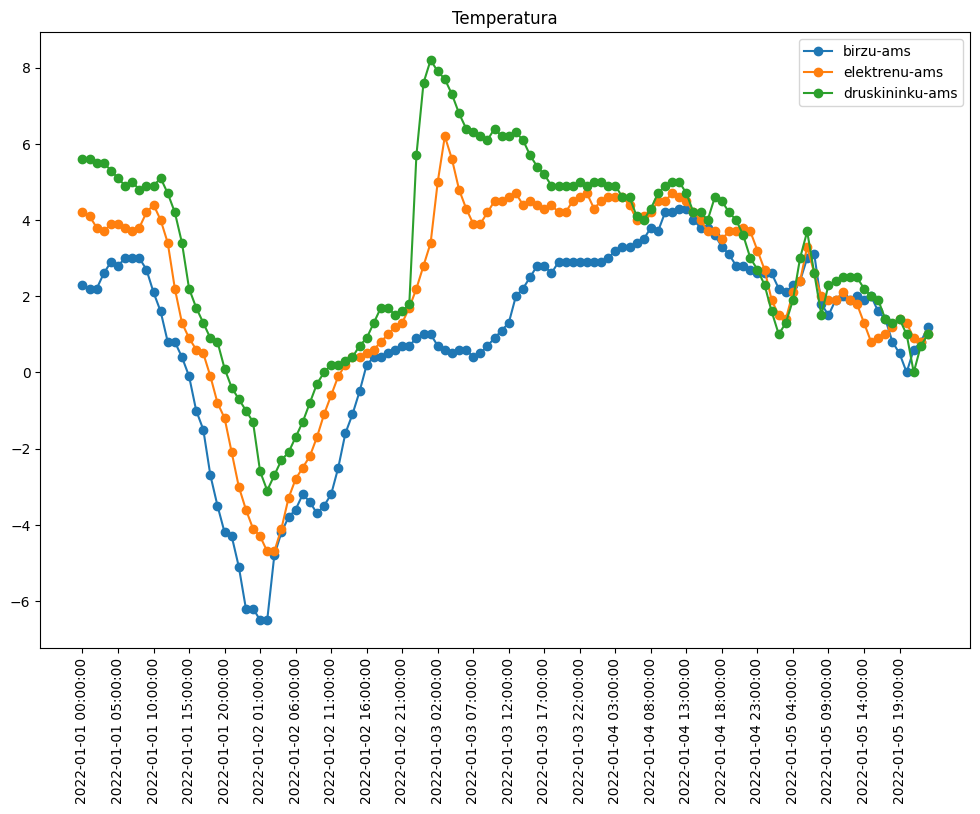

In [128]:
fig, axis = plt.subplots(figsize=(12, 8))  
axis.plot(a1_time, a1_temp, label = a1, marker ='o')
axis.plot(a1_time, a2_temp, label = a2, marker ='o')
axis.plot(a1_time, a3_temp, label = a3, marker ='o')
axis.set_xticks(a1_time[::5])
plt.xticks(rotation=90)
axis.legend(loc='best')
plt.title('Temperatura')
plt.show()